# Unsupervised Learning

In [1]:
import pandas as pd

In [2]:
customers = pd.read_csv("customers.csv")

In [3]:
customers.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


In [4]:
customers.columns

Index(['customer_id', 'age', 'gender', 'dependent_count', 'education_level',
       'marital_status', 'estimated_income', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon', 'credit_limit',
       'total_trans_amount', 'total_trans_count', 'avg_utilization_ratio'],
      dtype='object')

In [5]:
customers.dtypes.value_counts()

int64      9
object     3
float64    2
Name: count, dtype: int64

In [6]:
customers_modify = customers.copy()

In [7]:
customers_modify["gender"]= customers_modify["gender"].map({"M":1,"F":0})

In [8]:
customers_modify

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,1,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,0,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,1,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,0,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,1,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,1,2,Graduate,Single,51000,40,3,2,4003.0,15476,117,0.462
10123,710638233,41,1,2,Graduate,Divorced,40000,25,4,2,4277.0,8764,69,0.511
10124,716506083,44,0,1,High School,Married,33000,36,5,3,5409.0,10291,60,0.000
10125,717406983,30,1,2,Graduate,Unknown,47000,36,4,3,5281.0,8395,62,0.000


In [9]:
customers_modify.education_level.value_counts()

education_level
Graduate         3685
High School      2351
Uneducated       1755
College          1192
Post-Graduate     616
Doctorate         528
Name: count, dtype: int64

In [10]:
customers_modify.education_level.value_counts().index

Index(['Graduate', 'High School', 'Uneducated', 'College', 'Post-Graduate',
       'Doctorate'],
      dtype='object', name='education_level')

In [11]:
edl = {'Graduate':3, 'High School':1, 'Uneducated':0, 'College':2, 'Post-Graduate':4,
       'Doctorate':5}

In [12]:
customers_modify.education_level = customers_modify.education_level.replace(edl)

C:\Users\CGDC\AppData\Local\Temp\ipykernel_13888\2658661318.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  customers_modify.education_level = customers_modify.education_level.replace(edl)


In [13]:
customers_modify.marital_status.value_counts()

marital_status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

In [14]:
pd.get_dummies(customers_modify.marital_status)

,Divorced,Married,Single,Unknown
0,False,True,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,False,True
4,False,True,False,False
...,...,...,...,...
10122,False,False,True,False
10123,True,False,False,False
10124,False,True,False,False
10125,False,False,False,True


In [15]:
pd.get_dummies(customers_modify, drop_first=True)

,customer_id,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Married,marital_status_Single,marital_status_Unknown
0,768805383,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,True,False,False
1,818770008,49,0,5,3,24000,44,6,1,8256.0,1291,33,0.105,False,True,False
2,713982108,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,True,False,False
3,769911858,40,0,4,1,37000,34,3,4,3313.0,1171,20,0.760,False,False,True
4,709106358,40,1,3,0,65000,21,5,1,4716.0,816,28,0.000,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,1,2,3,51000,40,3,2,4003.0,15476,117,0.462,False,True,False
10123,710638233,41,1,2,3,40000,25,4,2,4277.0,8764,69,0.511,False,False,False
10124,716506083,44,0,1,1,33000,36,5,3,5409.0,10291,60,0.000,True,False,False
10125,717406983,30,1,2,3,47000,36,4,3,5281.0,8395,62,0.000,False,False,True


In [16]:
customers_modify = pd.get_dummies(customers_modify, drop_first=True)

In [17]:
customers_modify.dtypes.value_counts()

int64      11
bool        3
float64     2
Name: count, dtype: int64

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
X = customers_modify

In [21]:
X_scaled = scaler.fit_transform(X)

In [22]:
X_scaled

array([[ 0.8028781 , -0.16540558,  1.05995565, ...,  1.07733799,
        -0.79850685, -0.28260887],
       [ 2.15686101,  0.33357038, -0.9434357 , ..., -0.92821381,
         1.2523374 , -0.28260887],
       [-0.68276854,  0.58305837,  1.05995565, ...,  1.07733799,
        -0.79850685, -0.28260887],
       ...,
       [-0.61437177, -0.29014957, -0.9434357 , ...,  1.07733799,
        -0.79850685, -0.28260887],
       [-0.58995843, -2.03656544,  1.05995565, ..., -0.92821381,
        -0.79850685,  3.53845931],
       [-0.67314507, -0.41489356, -0.9434357 , ...,  1.07733799,
        -0.79850685, -0.28260887]])

In [23]:
X_scaled = pd.DataFrame(X_scaled)

In [24]:
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.802878,-0.165406,1.059956,0.503368,-0.752211,0.175810,0.384621,0.763943,-1.327136,0.446622,-0.959707,-0.973895,-0.775882,1.077338,-0.798507,-0.282609
1,2.156861,0.333570,-0.943436,2.043199,0.662787,-0.967166,1.010715,1.407306,-1.327136,-0.041367,-0.916433,-1.357340,-0.616276,-0.928214,1.252337,-0.282609
2,-0.682769,0.583058,1.059956,0.503368,0.662787,0.785397,0.008965,0.120579,-1.327136,-0.573698,-0.740982,-1.911206,-0.997155,1.077338,-0.798507,-0.282609
3,0.832862,-0.789126,-0.943436,1.273283,-0.752211,-0.636973,-0.241473,-0.522785,1.641478,-0.585251,-0.951758,-1.911206,1.759686,-0.928214,-0.798507,3.538459
4,-0.814896,-0.789126,1.059956,0.503368,-1.459710,0.074212,-1.869317,0.763943,-1.327136,-0.430877,-1.056263,-1.570365,-0.997155,1.077338,-0.798507,-0.282609


In [25]:
from sklearn.cluster import KMeans

In [26]:
model = KMeans()

In [27]:
cl = model.fit_predict(X_scaled)

In [28]:
pd.Series(cl).value_counts().sort_index()

0     956
1    1313
2    1755
3     828
4    1112
5    1917
6    1517
7     729
Name: count, dtype: int64

In [29]:
model.inertia_

101088.80114405826

In [30]:
model.cluster_centers_

array([[ 1.42639708e-01,  1.25636275e+00, -3.08469614e-01,
        -8.14990976e-01,  3.07741995e-02, -2.97507521e-01,
         1.16304688e+00,  2.40368499e-01, -2.08629216e-02,
        -4.63616858e-01, -5.72548805e-01, -7.52536245e-01,
         4.12432465e-01,  9.82934397e-01, -7.98506854e-01,
        -2.82608874e-01],
       [ 1.01994755e-01,  1.00283330e+00, -2.86836402e-01,
        -4.50223579e-01,  7.98551779e-02, -3.38335648e-01,
         8.91986030e-01, -4.36944202e-02,  2.13737715e-01,
        -3.77471478e-01, -1.30832764e-01,  6.08677915e-02,
         1.66210756e-01, -9.28213813e-01,  1.18355909e+00,
        -2.82608874e-01],
       [-9.44561576e-02, -8.18765560e-01, -2.65364783e-01,
         1.11610669e-01, -5.43872870e-02, -3.55234270e-01,
        -7.20657898e-01,  1.53205464e-01, -9.57108296e-02,
        -3.83326001e-01, -2.34479610e-01, -3.62205558e-02,
         1.54190904e-01, -9.28213813e-01,  1.17988593e+00,
        -2.82608874e-01],
       [-5.32601929e-02, -1.53051707e

In [31]:
inertias = []

for i in range(1,11):
    model = KMeans(i)
    model.fit_predict(X_scaled)
    inertia = model.inertia_
    inertias.append(inertia)


In [32]:
inertias

[162031.99999999988,
 144916.65628794767,
 135714.92707347218,
 123719.6883449864,
 114198.84656422981,
 108778.14017664103,
 104665.60053459989,
 101265.44375902512,
 98470.82285510417,
 96439.37168448385]

In [33]:
import matplotlib.pyplot as plt

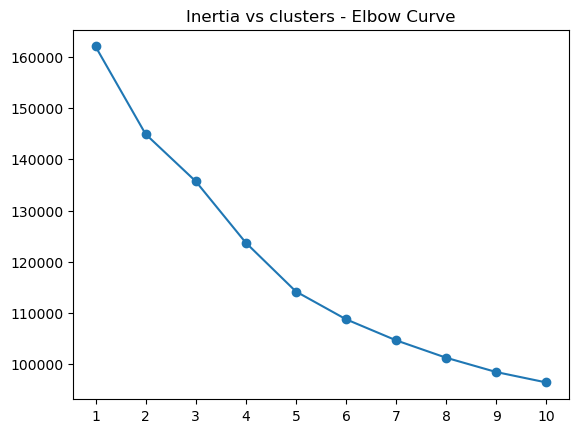

In [34]:
plt.plot(range(1,11),inertias, marker = "o")
plt.title("Inertia vs clusters - Elbow Curve")
plt.xticks(range(1,11))
plt.show()

In [35]:
model = KMeans(n_clusters=6)
y = model.fit_predict(X_scaled)

In [36]:
customers["CLUSTER"] = y + 1

In [37]:
customers

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,CLUSTER
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061,3
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105,4
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000,2
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760,6
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,M,2,Graduate,Single,51000,40,3,2,4003.0,15476,117,0.462,5
10123,710638233,41,M,2,Graduate,Divorced,40000,25,4,2,4277.0,8764,69,0.511,6
10124,716506083,44,F,1,High School,Married,33000,36,5,3,5409.0,10291,60,0.000,6
10125,717406983,30,M,2,Graduate,Unknown,47000,36,4,3,5281.0,8395,62,0.000,6


# Reasoning

In [38]:
numeric_cols = customers.select_dtypes("number").drop(["customer_id", "CLUSTER"], axis = 1).columns

In [39]:
len(numeric_cols)

10

In [40]:
numeric_cols

Index(['age', 'dependent_count', 'estimated_income', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon', 'credit_limit',
       'total_trans_amount', 'total_trans_count', 'avg_utilization_ratio'],
      dtype='object')

In [52]:
"age".title()

'Age'

In [43]:
customers.groupby("CLUSTER")['age'].mean()

CLUSTER
1    54.971429
2    54.318860
3    46.410556
4    40.409436
5    45.149844
6    42.297857
Name: age, dtype: float64

In [48]:
import seaborn as sns

sns.set_style("darkgrid")

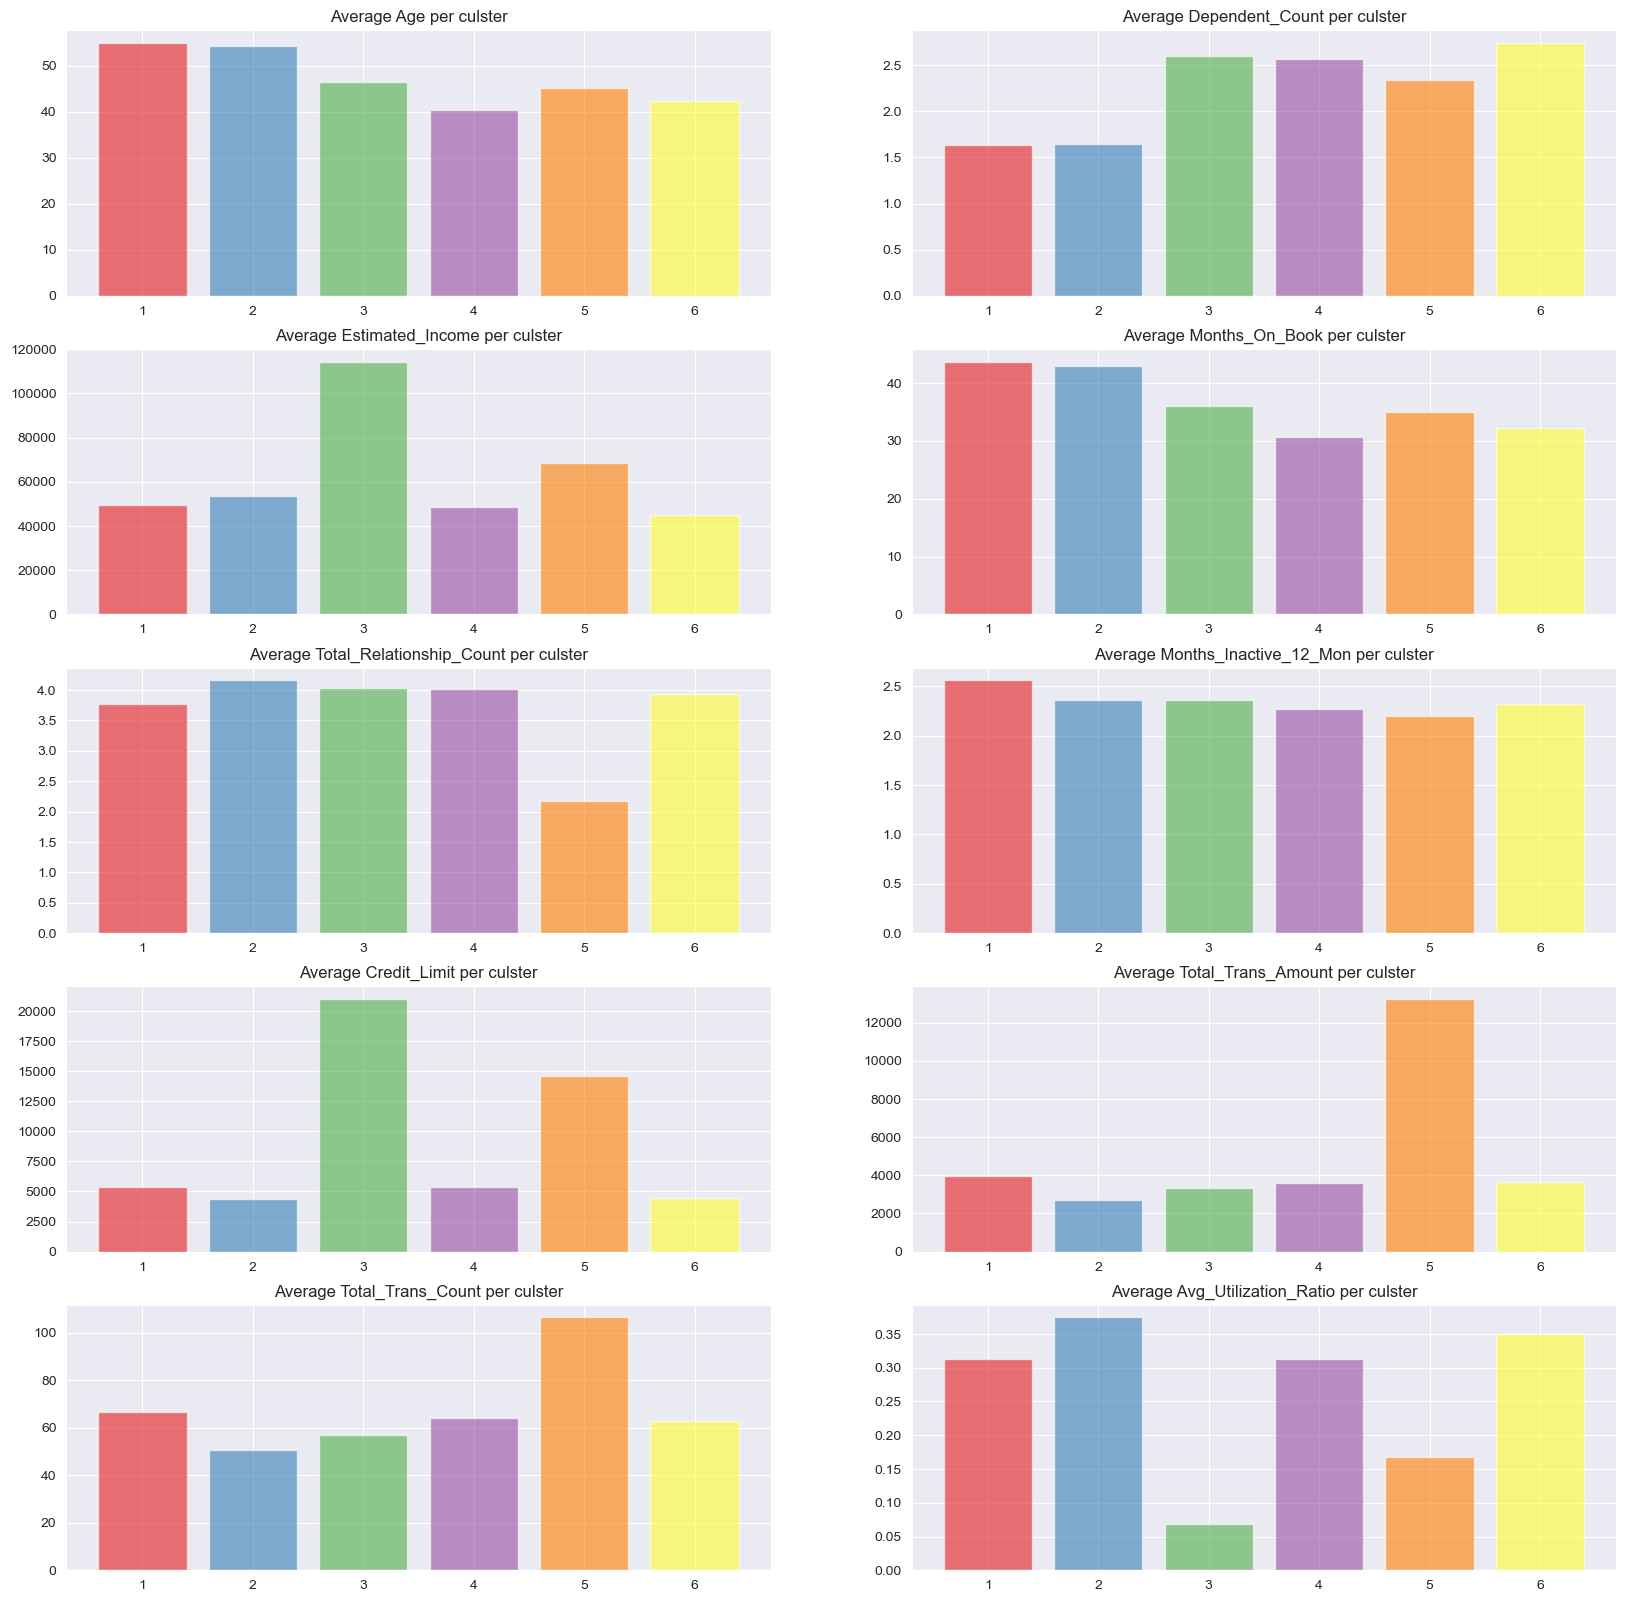

In [53]:
plt.figure(figsize=(20,20))

for i,c in  enumerate(numeric_cols):
    group_means = customers.groupby("CLUSTER")[c].mean()
    ax = plt.subplot(5,2, i+1)
    ax.bar(group_means.index, group_means, color = sns.color_palette("Set1"), alpha = 0.6)
    ax.set_title(f"Average {c.title()} per culster")

plt.show()

In [56]:
cat_cols = customers.select_dtypes("object").columns

In [57]:
cat_cols

Index(['gender', 'education_level', 'marital_status'], dtype='object')

In [60]:
customers.groupby("CLUSTER")["gender"].value_counts()

CLUSTER  gender
1        F          847
         M          448
2        F          920
         M          554
3        M         1741
         F           59
4        F         1214
         M          630
5        M          620
         F          341
6        F         1977
         M          776
Name: count, dtype: int64

In [63]:
df_gender = pd.crosstab(index=customers["CLUSTER"],columns=customers["gender"], values=customers["gender"]
            , aggfunc="size", normalize="index")

In [64]:
df_gender 

gender,F,M
CLUSTER,,
1,0.654054,0.345946
2,0.624152,0.375848
3,0.032778,0.967222
4,0.658351,0.341649
5,0.354839,0.645161
6,0.718126,0.281874


<Axes: xlabel='CLUSTER'>

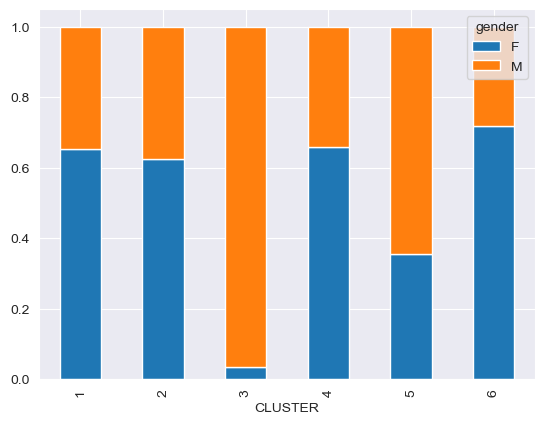

In [65]:
df_gender.plot.bar(stacked = True)

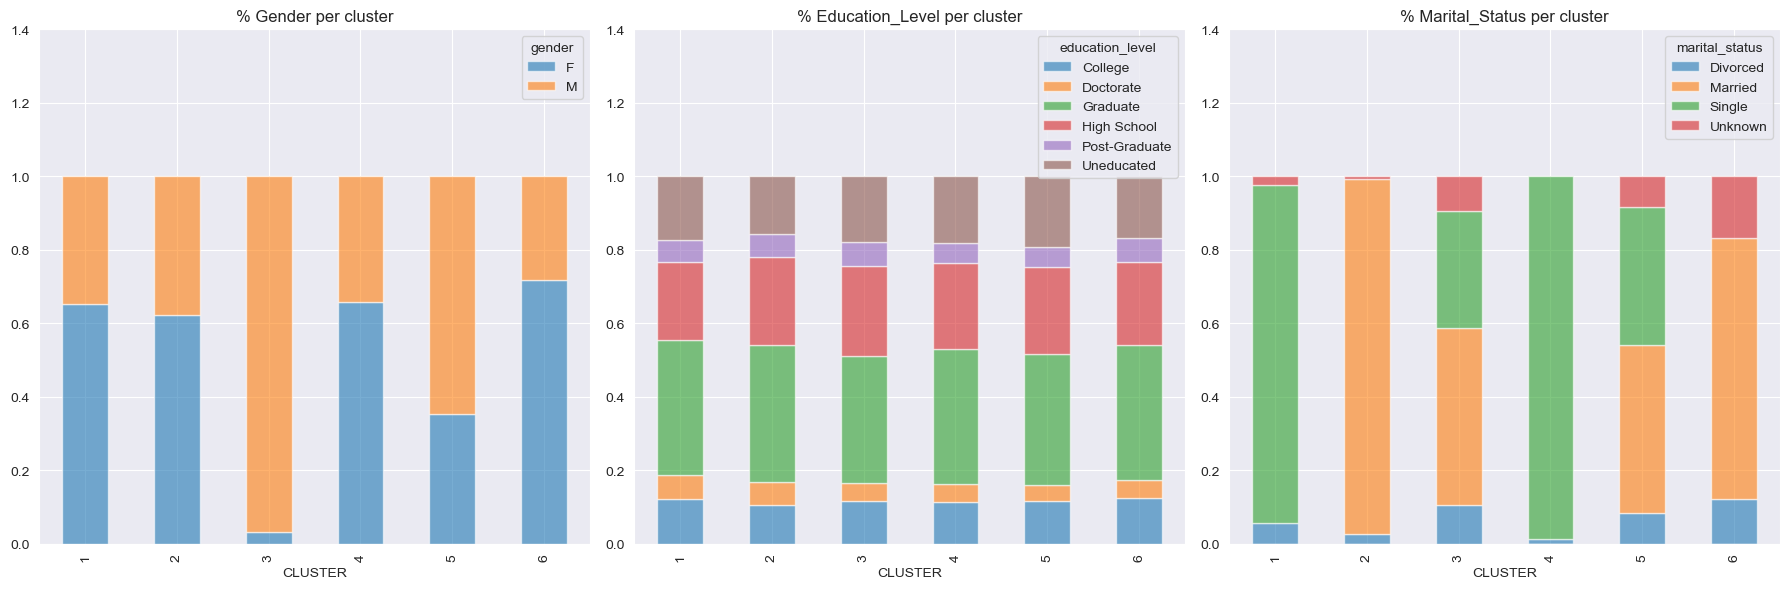

In [70]:
plt.figure(figsize=(18,6))

for i,v in enumerate(cat_cols):
    ax = plt.subplot(1,3, i+1)
    df = pd.crosstab(index=customers["CLUSTER"],columns=customers[v], values=customers[v]
            , aggfunc="size", normalize="index")
    df.plot.bar(stacked = True, ax= ax, alpha = 0.6)
    ax.set_ylim(0,1.4)
    ax.set_title(f"% {v.title()} per cluster")
    
plt.tight_layout()
plt.show()